# Proyecto final del curso de Data Science comision 23050

#### El dataset se obtuvo del siguiente link (https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?ref=hackernoon.com&select=Car+details+v3.csv). 
#### El objetivo de este proyecto es poder predecir el valor de un auto usado segun distintos parametros

## Importacion de las librerias

In [2]:
# deshabilito los warnings
import warnings
warnings.filterwarnings('ignore')

#Datos
import pandas as pd
import numpy as np

# Visualizacion de Datos
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# esta línea se agrega para que imprima los gráficos dentro del notebook
%matplotlib inline  

from funpymodeling.exploratory import profiling_num
from funpymodeling.exploratory import freq_tbl

## Data Acquisition

In [3]:
# Obtencion del Dataset

df = pd.read_csv("Car details v3.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Data Wrangling

In [4]:
# Observo la dimension del df

df.shape

(8128, 13)

In [5]:
# veo la cantidad de valores vacios que hay.

df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
# se decide eliminar los registros con valores vacios

df.dropna(inplace=True)

In [7]:
# se comprueba que ya no quedan valores vacios en ningun registro

df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [8]:
# veo los tipos de datos de cada variable. Observo que las variables mileage, engine y max_power son de tipo objeto ya que tienen el valor numero y el valor de medicion de ese dato.

df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [9]:
# se procede a separar las variables mencionadas en el punto anterior para que se puedan trabajar como valores numericos.

mileage = df['mileage'].str.split(' ', expand=True)
engine = df['engine'].str.split(' ', expand=True)
max_power = df['max_power'].str.split(' ', expand=True)

In [10]:
# elimino las 3 columnas en cuestion para luego reemplazarlas por los valores que separe

df.drop(["mileage", "engine", "max_power"], inplace=True, axis=1)

In [11]:
# empiezo separando la varialbe mileage. Obtengo millas y la unidad de medida

df[["miles_per_liter","measure"]] = mileage

In [12]:
# observo que tengo 7819 registros como "kilometros por litro" y 87 en "kilometros por kilo". Para facilitar el analisis voy a eliminar los 87 registros que se midieron por kilo.
df["measure"].value_counts()

kmpl     7819
km/kg      87
Name: measure, dtype: int64

In [13]:
# me quedo solo con los que se midieron por litro

df = df[df["measure"] == "kmpl"]

In [14]:
# separo ahora los valores obtenidos de la variable engine

df[["engine_consumption","engine_measure"]] = engine

In [15]:
# observo que valores tengo en la columna "engine_measure". Me doy cuenta que solo tengo CC, asi que no hace falta hacer nada mas aca.

df["engine_measure"].value_counts()

CC    7819
Name: engine_measure, dtype: int64

In [16]:
# separo ahora los valores obtenidos de la variable max_power

df[["max_power","max_power_measure"]] = max_power

In [17]:
# observo que aca tambien solo tengo un valor de medida, asi que no hay que hacer nada mas.

df["max_power_measure"].value_counts()

bhp    7819
Name: max_power_measure, dtype: int64

In [18]:
# veo como tengo el df hasta el momento

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,miles_per_liter,measure,engine_consumption,engine_measure,max_power,max_power_measure
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,23.4,kmpl,1248,CC,74,bhp
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,21.14,kmpl,1498,CC,103.52,bhp
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,17.7,kmpl,1497,CC,78,bhp
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,23.0,kmpl,1396,CC,90,bhp
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,16.1,kmpl,1298,CC,88.2,bhp


In [19]:
# vuelvo a ver los tipos de datos y veo que, a pesar de haber convertido las columnas a variables con numeros, el tipo de dato sigue siendo "objetc"

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7819 entries, 0 to 8127
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7819 non-null   object 
 1   year                7819 non-null   int64  
 2   selling_price       7819 non-null   int64  
 3   km_driven           7819 non-null   int64  
 4   fuel                7819 non-null   object 
 5   seller_type         7819 non-null   object 
 6   transmission        7819 non-null   object 
 7   owner               7819 non-null   object 
 8   torque              7819 non-null   object 
 9   seats               7819 non-null   float64
 10  miles_per_liter     7819 non-null   object 
 11  measure             7819 non-null   object 
 12  engine_consumption  7819 non-null   object 
 13  engine_measure      7819 non-null   object 
 14  max_power           7819 non-null   object 
 15  max_power_measure   7819 non-null   object 
dtypes: flo

In [20]:
# hago la conversion de las variables que me interesan a tipo de valor flotante

df[["miles_per_liter","engine_consumption","max_power"]]= df[["miles_per_liter","engine_consumption","max_power"]].astype("float")

In [21]:
# vuelvo a observar los tipos de datos, ahora si correctamente

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7819 entries, 0 to 8127
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7819 non-null   object 
 1   year                7819 non-null   int64  
 2   selling_price       7819 non-null   int64  
 3   km_driven           7819 non-null   int64  
 4   fuel                7819 non-null   object 
 5   seller_type         7819 non-null   object 
 6   transmission        7819 non-null   object 
 7   owner               7819 non-null   object 
 8   torque              7819 non-null   object 
 9   seats               7819 non-null   float64
 10  miles_per_liter     7819 non-null   float64
 11  measure             7819 non-null   object 
 12  engine_consumption  7819 non-null   float64
 13  engine_measure      7819 non-null   object 
 14  max_power           7819 non-null   float64
 15  max_power_measure   7819 non-null   object 
dtypes: flo

In [22]:
# me quedo con las columnas que me va a interesar trabajar

df_reduced = df[["year","km_driven", "fuel", "seller_type", "transmission", "owner", "seats", "miles_per_liter", "engine_consumption", "max_power","selling_price"]]

In [23]:
# observo la informacion

df_reduced

,year,km_driven,fuel,seller_type,transmission,owner,seats,miles_per_liter,engine_consumption,max_power,selling_price
0,2014,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,1248.0,74.00,450000
1,2014,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1498.0,103.52,370000
2,2006,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,1497.0,78.00,158000
3,2010,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,1396.0,90.00,225000
4,2007,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,Petrol,Individual,Manual,First Owner,5.0,18.50,1197.0,82.85,320000
8124,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,16.80,1493.0,110.00,135000
8125,2009,120000,Diesel,Individual,Manual,First Owner,5.0,19.30,1248.0,73.90,382000
8126,2013,25000,Diesel,Individual,Manual,First Owner,5.0,23.57,1396.0,70.00,290000


## EDA

#### Se observa la distribucion de las variables tipo de combustible, tipo de vendedor y tipo de transmision

Text(0.5, 0, 'Tipo de transmision')

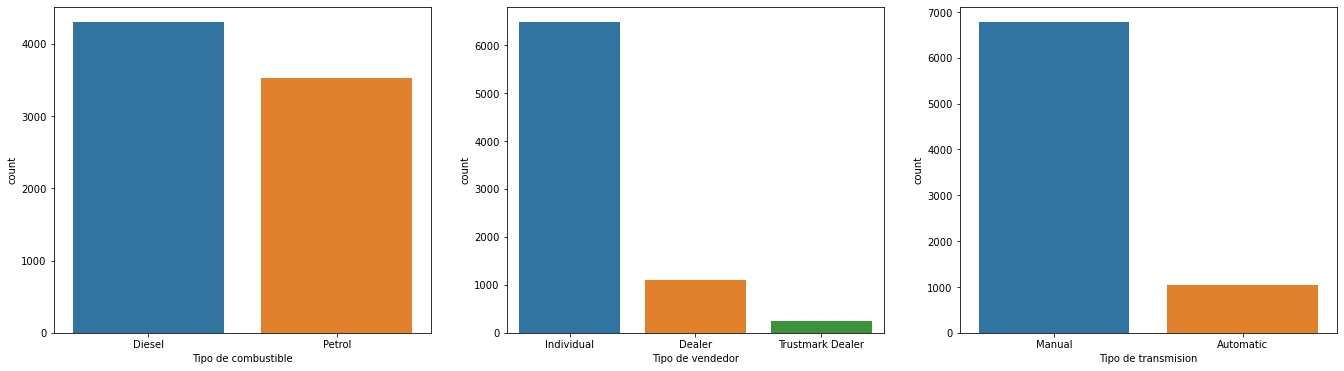

In [24]:
fig, axes = plt.subplots(1,3,figsize=(23,6))

plt.subplot(1,3,1)
sns.countplot(df_reduced["fuel"])
plt.xlabel("Tipo de combustible")

plt.subplot(1,3,2)
sns.countplot(df_reduced["seller_type"])
plt.xlabel("Tipo de vendedor")

plt.subplot(1,3,3)
sns.countplot(df_reduced["transmission"])
plt.xlabel("Tipo de transmision")


#### Se observa la distribucion en porcentaje que tiene cada una de las variables

In [25]:
print("% combustible:")
print (df_reduced["fuel"].value_counts(normalize=True))
 
print ("---"*15)

print("% vendedor:")
print (df_reduced["seller_type"].value_counts(normalize=True))
print ("---"*15)

print("% transmision:")
print (df_reduced["seller_type"].value_counts(normalize=True))

% combustible:
Diesel    0.549815
Petrol    0.450185
Name: fuel, dtype: float64
---------------------------------------------
% vendedor:
Individual          0.828367
Dealer              0.141450
Trustmark Dealer    0.030183
Name: seller_type, dtype: float64
---------------------------------------------
% transmision:
Individual          0.828367
Dealer              0.141450
Trustmark Dealer    0.030183
Name: seller_type, dtype: float64


#### Se observa la distribucion de la variable "owner"

Text(0.5, 0, 'Tipo de combustible')

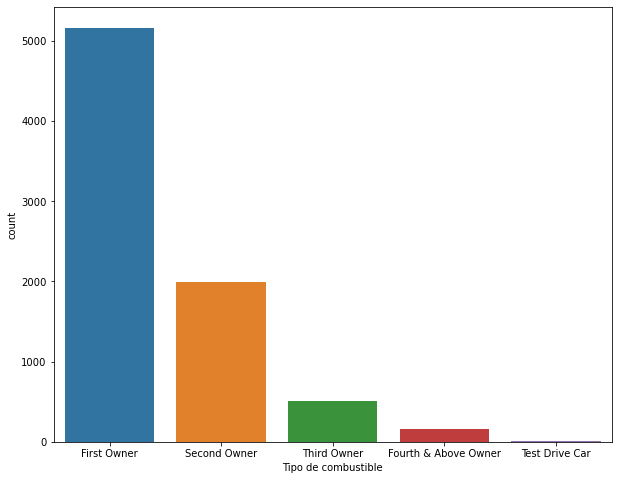

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(df_reduced["owner"])
plt.xlabel("Tipo de combustible")

#### Se realiza un histograma de las variables numericas. Se observa lo siguiente:
#### Kilometros recorridos: tiene una distribucion normal acostada sobre la cola derecha.
#### Millas por litro: tiene una distribucion normal
#### Engine Consumption: no tiene distribucion normal
#### Max_power: no tiene distribucion normal

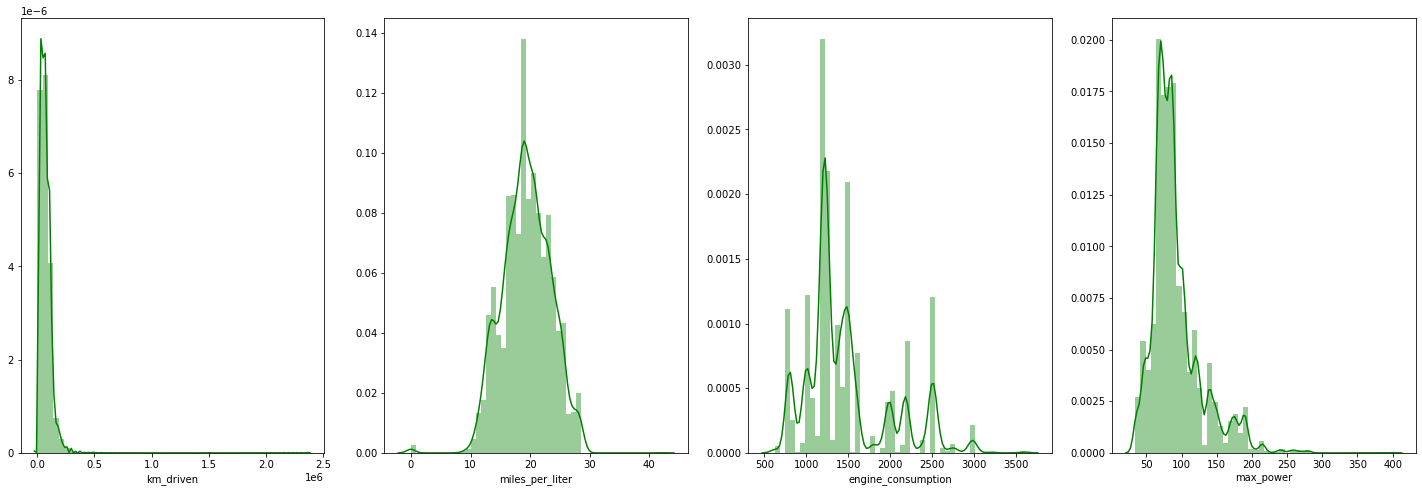

In [27]:
fig, axes = plt.subplots(1,4,figsize=(25,8))

sns.distplot(df_reduced["km_driven"], hist=True, kde=True, color="g",ax=axes[0] )

sns.distplot(df_reduced["miles_per_liter"], hist=True, kde=True, color="g", ax=axes[1])

sns.distplot(df_reduced["engine_consumption"], hist=True, kde=True, color="g", ax=axes[2])

sns.distplot(df_reduced["max_power"], hist=True, kde=True, color="g", ax=axes[3])

plt.show()

#### Se realiza un analisis con Boxplots. Se observa que todas las variables numericas tienen valores anomalos que deberan ser tratados para evitar distorciones en el modelo

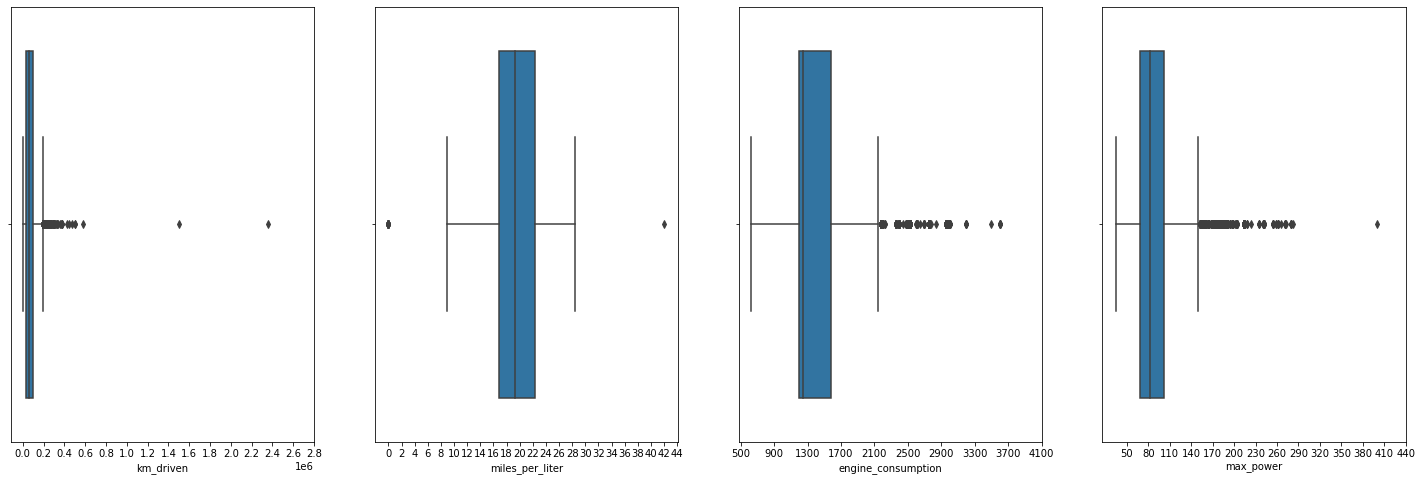

In [28]:
# boxplot
# aclaracion: el eje x de la figura "km_driven" esta en formato cientifico ya que hay valores muy grandes. Para obtener los valores reales se debe multiplicar por 1000000

fig, axes = plt.subplots(1,4,figsize=(25,8))

plt.subplot(1,4,1)
sns.boxplot(df_reduced["km_driven"])
plt.xticks(np.arange(0,3000000,200000))

plt.subplot(1,4,2)
sns.boxplot(df_reduced["miles_per_liter"])
plt.xticks(np.arange(0,45,2))

plt.subplot(1,4,3)
sns.boxplot(df_reduced["engine_consumption"])
plt.xticks(np.arange(500,4500,400))

plt.subplot(1,4,4)
sns.boxplot(df_reduced["max_power"])
plt.xticks(np.arange(50,450,30))

plt.show()

#### Se realiza un analisis por separado mi variable target: "selling price". Observo que despues de los $180.000 (aprox), empiezan los valores extremos.

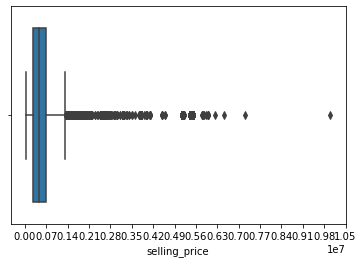

In [29]:
sns.boxplot(df_reduced["selling_price"])
plt.xticks(np.arange(0,11000000,700000))
plt.show()

#### Analizo la relacion entre los kilometros recorridos y la variable tipo de combustible. Se observa que los autos con combustible diesel tienen valores mas altos que los que tienen Petrol

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

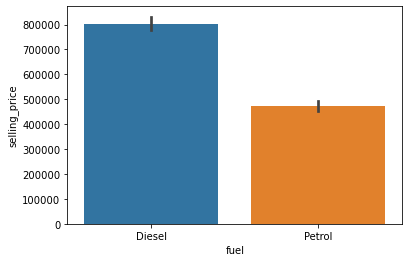

In [30]:
sns.barplot(x= df_reduced["fuel"], y = df_reduced["selling_price"])

#### Analizo la variable tipo de dueño. Observo que hay unos pocos autos de prueba con precios muy altos

Text(0.5, 0, 'Dueño')

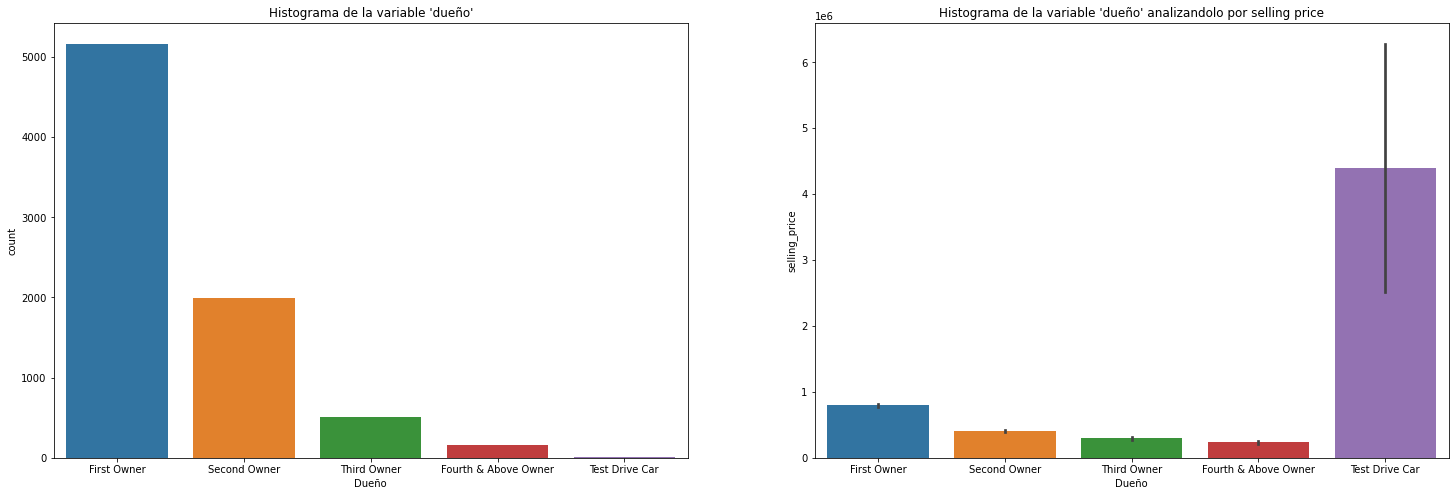

In [31]:
fig, axes = plt.subplots(1,2,figsize=(25,8))

plt.subplot(1,2,1)
sns.countplot(df_reduced["owner"])
plt.title("Histograma de la variable 'dueño'")
plt.xlabel("Dueño")

plt.subplot(1,2,2)
sns.barplot(x= df_reduced["owner"], y = df_reduced["selling_price"])
plt.title("Histograma de la variable 'dueño' analizandolo por selling price")
plt.xlabel("Dueño")

#### Observo que hay 5 autos de prueba que tienen valores muy altos por lo que debo eliminarlos para no distorcionar el analisis


In [32]:
df_reduced["owner"].value_counts()

First Owner             5165
Second Owner            1988
Third Owner              503
Fourth & Above Owner     158
Test Drive Car             5
Name: owner, dtype: int64

#### Observo la correlacion entre las variables numericas. Se observa que el precio de venta tiene su mayor correlacion con el poder maximo del auto. 

<AxesSubplot:>

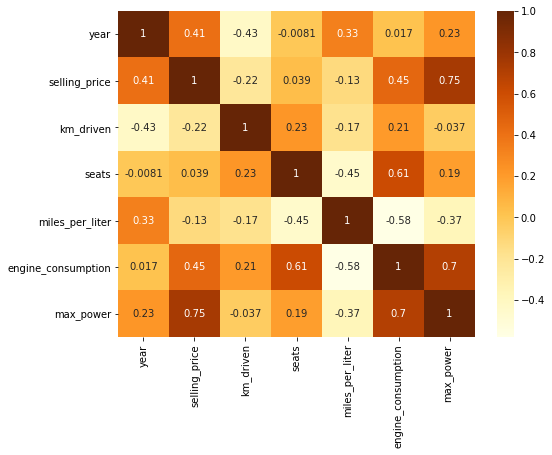

In [33]:
plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True,cmap="YlOrBr")

#### Vuelvo a ver esa relacion entre las variables. Se vuelven a observar los valores extremos ya vistos en el boxplot.

<AxesSubplot:xlabel='selling_price', ylabel='max_power'>

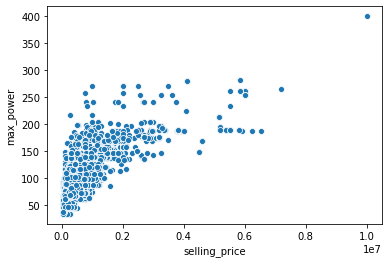

In [34]:
# aca de vuelve a ver esa relacion entre las variables. Se vuelven a observar los valores extremos ya vistos en el boxplot.

sns.scatterplot(df_reduced["selling_price"],df["max_power"])

#### Observo lo mismo que en el grafico anterior pero segmentandolo tambien por el tipo de combustible

<AxesSubplot:xlabel='selling_price', ylabel='max_power'>

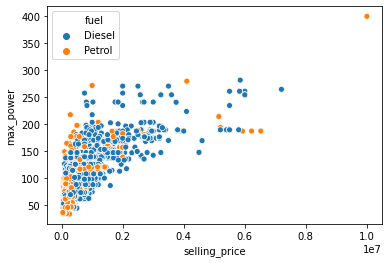

In [35]:
sns.scatterplot(df_reduced["selling_price"],df["max_power"], hue= df["fuel"])

### Eliminacion de valores outliers

#### Elimino los registros con:
#### kilometros conducidos menores a 174.000
#### Millas por litro mayores a 10 y menore a 30
#### Consumo del motor menor a 1850
#### Max Power menor a 125
#### Selling price menor a 1.300.000

In [36]:
df_reduced_2 = df_reduced[df_reduced["km_driven"]<173000]

In [37]:
df_reduced_2 = df_reduced_2[ (df_reduced_2["miles_per_liter"]>10)  & (df_reduced_2["miles_per_liter"]<30)]

In [38]:
df_reduced_2 = df_reduced_2[df_reduced_2["engine_consumption"]<2200]

In [39]:
df_reduced_2 = df_reduced_2[df_reduced_2["engine_consumption"]<1850]

In [40]:
df_reduced_2 = df_reduced_2[df_reduced_2["max_power"]<125]

In [41]:
df_reduced_2 = df_reduced_2[df_reduced_2["selling_price"]<1100000]

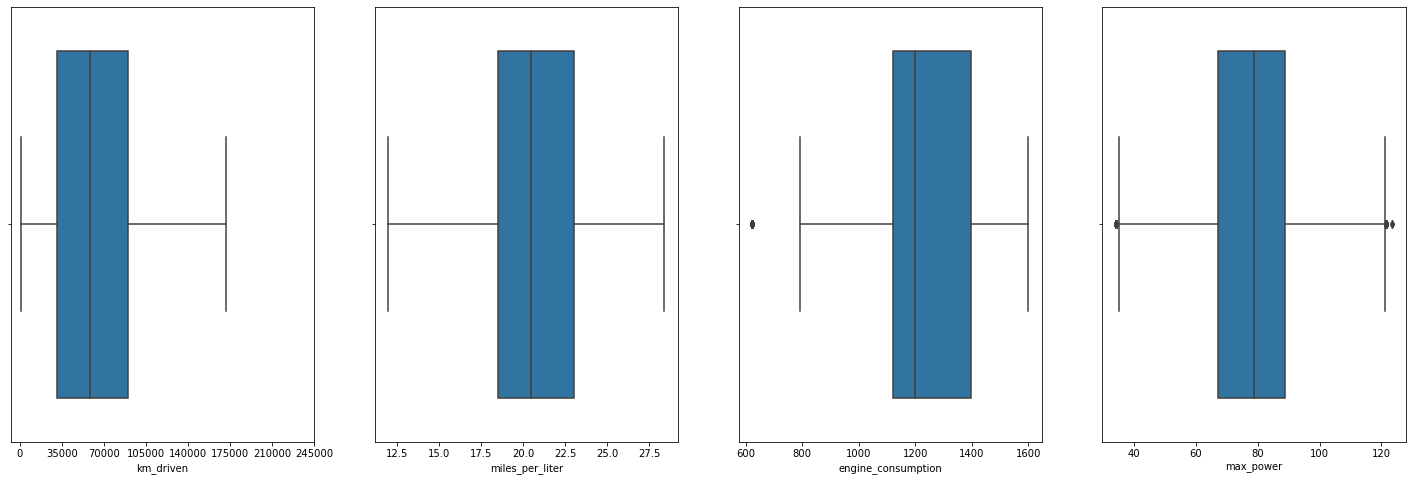

In [42]:
fig, axes = plt.subplots(1,4,figsize=(25,8))

plt.subplot(1,4,1)
sns.boxplot(df_reduced_2["km_driven"])
plt.xticks(np.arange(0,250000,35000))

plt.subplot(1,4,2)
sns.boxplot(df_reduced_2["miles_per_liter"])


plt.subplot(1,4,3)
sns.boxplot(df_reduced_2["engine_consumption"])

plt.subplot(1,4,4)
sns.boxplot(df_reduced_2["max_power"])


plt.show()

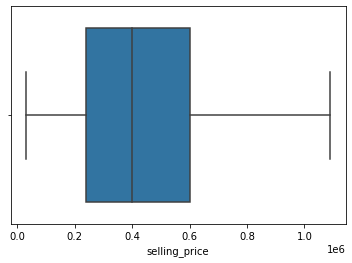

In [43]:
sns.boxplot(df_reduced_2["selling_price"])

plt.show()

In [44]:
# observo el df con el que voy a trabajar

df_reduced_2

,year,km_driven,fuel,seller_type,transmission,owner,seats,miles_per_liter,engine_consumption,max_power,selling_price
0,2014,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,1248.0,74.00,450000
1,2014,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1498.0,103.52,370000
2,2006,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,1497.0,78.00,158000
3,2010,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,1396.0,90.00,225000
4,2007,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,Petrol,Individual,Manual,First Owner,5.0,18.50,1197.0,82.85,320000
8124,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,16.80,1493.0,110.00,135000
8125,2009,120000,Diesel,Individual,Manual,First Owner,5.0,19.30,1248.0,73.90,382000
8126,2013,25000,Diesel,Individual,Manual,First Owner,5.0,23.57,1396.0,70.00,290000


## Etapa de eleccion del modelo de prediccion

#### Definicion de las variables independientes y de la variable dependiente

In [45]:
x = df_reduced_2[["year", "engine_consumption", "max_power"]]
y = df_reduced_2["selling_price"]

#### Separacion de los datos en datos de entrenamiento y de prueba

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

### Regresion Linear

#### Se trabajara con la variable target "selling_price" .La variable predictora sera "max_power", "year" y "engine_consumption" ya que se observo en el analisis de correlacion que son las variables que mejor explican el cambio en el precio

#### Entrenamiento del modelo

In [47]:
from sklearn import linear_model

regresion = linear_model.LinearRegression()

modelo = regresion.fit(x_train,y_train)

#### Generacion de la prediccion sobre los datos de prueba del modelo

In [48]:
y_pred_linearregression = modelo.predict(x_test)

#### Evaluacion del modelo

In [49]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_linearregression)

0.6978399093027655

In [50]:
# raiz cuadrada del error cuadratico medio

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred_linearregression , squared=False)

123686.33027672021

In [51]:
# error cuadratico medio

mean_squared_error(y_test,y_pred_linearregression)

15298308297.321917

In [52]:
# error absoluto medio

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred_linearregression)

97212.06643928903

### Arbol de decision

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

arbol_decision = DecisionTreeClassifier(criterion="entropy", max_depth=3)

arbol = arbol_decision.fit(x_train, y_train)

#### Generacion de la prediccion

In [54]:
y_pred_decisiontree = arbol.predict(x_test)

#### Evaluacion del modelo

In [55]:
r2_score(y_test, y_pred_decisiontree)

0.7092410644766105

In [56]:
mean_squared_error(y_test,y_pred_decisiontree , squared=False)

121330.41648810139

In [57]:
mean_squared_error(y_test,y_pred_decisiontree)

14721069965.176144

In [58]:
mean_absolute_error(y_test,y_pred_decisiontree)

90038.81276005547

#### Grafico el arbol

In [59]:
print(tree.export_text(arbol,
                      feature_names=["year", "engine_consumption", "max_power"]))

|--- year <= 2013.50
|   |--- year <= 2009.50
|   |   |--- max_power <= 64.70
|   |   |   |--- class: 150000
|   |   |--- max_power >  64.70
|   |   |   |--- class: 150000
|   |--- year >  2009.50
|   |   |--- max_power <= 73.40
|   |   |   |--- class: 200000
|   |   |--- max_power >  73.40
|   |   |   |--- class: 350000
|--- year >  2013.50
|   |--- max_power <= 73.96
|   |   |--- max_power <= 66.55
|   |   |   |--- class: 250000
|   |   |--- max_power >  66.55
|   |   |   |--- class: 350000
|   |--- max_power >  73.96
|   |   |--- max_power <= 87.00
|   |   |   |--- class: 600000
|   |   |--- max_power >  87.00
|   |   |   |--- class: 650000



### Random Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor

bosque = RandomForestRegressor(n_estimators=100, 
                               max_features="sqrt",
                               bootstrap=True,
                               max_samples=2/3,
                               oob_score=True)

bosque.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', max_samples=0.6666666666666666,
                      oob_score=True)

#### Generacion de la prediccion

In [102]:
y_pred_randomforest = bosque.predict(x_test)

#### Evaluacion del modelo

In [103]:
r2_score(y_test, y_pred_randomforest)

0.8937500225688837

In [104]:
mean_squared_error(y_test,y_pred_randomforest , squared=False)

0.07054584286333812

In [105]:
mean_squared_error(y_test,y_pred_randomforest)

0.004976715945298794

In [106]:
mean_absolute_error(y_test,y_pred_randomforest)

0.05091223815228701

### KNN

#### Escalado de las variables

In [67]:
from sklearn import preprocessing 
escala_x = preprocessing.MinMaxScaler()
escala_y = preprocessing.MinMaxScaler()

x_escalado = escala_x.fit_transform(x)
y_escalado = escala_y.fit_transform(y.values.reshape(-1,1))

In [68]:
x_escalado

array([[0.76923077, 0.64      , 0.44633845],
       [0.76923077, 0.89641026, 0.7773915 ],
       [0.46153846, 0.89538462, 0.49119659],
       ...,
       [0.57692308, 0.64      , 0.445217  ],
       [0.73076923, 0.79179487, 0.40148032],
       [0.73076923, 0.79179487, 0.40148032]])

In [69]:
y_escalado

array([[0.39622698],
       [0.32075536],
       [0.12075555],
       ...,
       [0.3320761 ],
       [0.24528373],
       [0.24528373]])

#### Separacion de las variables en entrenamiento y prueba

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_escalado,y_escalado)

#### Creacion del modelo

In [71]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=3)

knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

#### Prediccion de los datos de prueba

In [72]:
y_pred_knnregressor = knn.predict(x_test)

#### Evaluacion del modelo

In [73]:
r2_score(y_test, y_pred_knnregressor)

0.8714090653917596

In [74]:
mean_squared_error(y_test,y_pred_decisiontree , squared=False)

455861.8520103154

In [75]:
mean_squared_error(y_test,y_pred_decisiontree)

207810028118.27472

In [76]:
mean_absolute_error(y_test,y_pred_decisiontree)

414597.4098196557

### Dudas

#### ¿Como selecciono las mejores variables para un modelo de regresion? Yo elegi por las 3 que tenian mayor correlacion con la variable target, pero no se si es correcto o me falto analizar algo.

#### ¿Es necesario normalizar las variables para la regresion multilineal y arbol de decision? Probe normalizando las variables y se reducia a la mitad la eficiencia del modelo

#### Escale los datos para el modelo KNN, pero observo que no hay diferencias en la eficiencia con los datos normalizados o sin normalizar (de las 2 maneras ronda entre el 84% y el 88%). ¿Por que sucede esto? ¿No se supone que un modelo de KNN como mide distancias si no se normaliza no funciona?

## Analisis con GridSearchCV

#### Defino el diccionario para luego analizar los distintos modelos y los distintos hiperparametros

In [107]:
model_params = {
    'linear_regression':{
        'model':linear_model.LinearRegression(),
        'params':{}
    },
    
    'random_forest':{
        'model':RandomForestRegressor(max_features="sqrt",
                               bootstrap=True,
                               max_samples=2/3,
                               oob_score=True),
        'params':{
            'n_estimators':[100,125,150],
            'criterion':['squared_error','absolute_error', 'poisson']
        }
    },
    'knn':{
        'model':KNeighborsRegressor(),
        'params':{
            'n_neighbors':np.arange(3,8,1)
        }
    }
}

#### Hago un for para hacer la comparacion

In [108]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


#### Imprimo los resultados: el mejor modelo es el de Random Forest con cirterio de squared_error y n_estimators=100

In [112]:
scores 

[{'model': 'linear_regression',
  'best_score': 0.6921945809506589,
  'best_params': {}},
 {'model': 'random_forest',
  'best_score': 0.8903992436966046,
  'best_params': {'criterion': 'squared_error', 'n_estimators': 100}},
 {'model': 'knn',
  'best_score': 0.8711503519378463,
  'best_params': {'n_neighbors': 4}}]

In [111]:
df_scores = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df_scores

,model,best_score,best_params
0,linear_regression,0.692195,{}
1,random_forest,0.890399,"{'criterion': 'squared_error', 'n_estimators':..."
2,knn,0.871150,{'n_neighbors': 4}
